# Programación Orientada a Arrays


El uso de arrays de NumPy permite expresar muchos tipos de tareas de procesamiento de datos como expresiones de array concisas que de otro modo podrían requerir la escritura de bucles. Esta práctica de reemplazar bucles explícitos con expresiones de array se conoce comúnmente como **vectorización**. En general, las operaciones de array vectorizadas suelen ser uno o dos (o más) órdenes de magnitud más rápidas que sus equivalentes en Python puro, con el mayor impacto en cualquier tipo de cálculos numéricos. 



Como ejemplo simple, supongamos que deseamos evaluar la función $$\sqrt{x^2 + y^2}$$ en una cuadrícula regular de valores. La función *np.meshgrid* toma dos arrays 1D y produce dos matrices 2D correspondientes a todos los pares de (x, y) en los dos arrays.
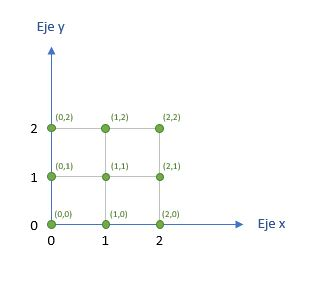

In [30]:
import numpy as np
points = np.arange(-5, 5, 0.01)
print(len(points))
xs, ys = np.meshgrid(points, points)
xs

1000


array([[-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       ...,
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99]])

Ahora, evaluar la función es cuestión de escribir la misma expresión que escribirías con dos puntos.

In [17]:
z = np.sqrt(xs ** 2 + ys ** 2)
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

Como adelanto, utilizo matplotlib para crear visualizaciones de este array bidimensional.

Text(0.5, 1.0, 'Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values')

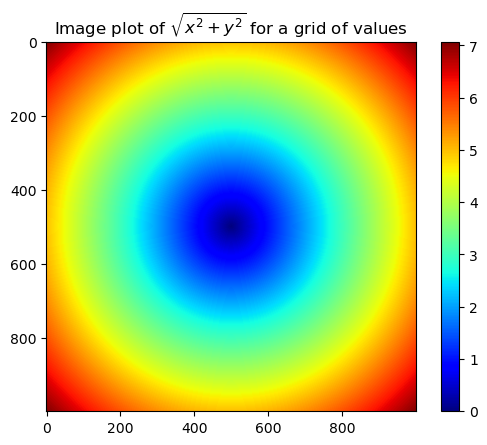

In [28]:
import matplotlib.pyplot as plt
plt.imshow(z, cmap=plt.cm.jet); plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

#### Expresando Lógica Condicional como Operaciones de Array
La función *numpy.where* es una versión vectorizada de la expresión 
            
            
            
            x if condition else y
Supongamos que tuviéramos un array booleano y dos arrays de valores.

In [32]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

Supongamos que queremos tomar un valor de *xarr* siempre que el valor correspondiente en *cond* sea **True**, y de lo contrario tomar el valor de *yarr*. Una comprensión de lista que hace esto podría parecerse a:

In [36]:
result = [(x if c else y) for x, y, c in zip(xarr, yarr, cond)]
result

[1.1, 2.2, 1.3, 1.4, 2.5]

Esto tiene múltiples problemas. Primero, no será muy rápido para arrays grandes (porque todo el trabajo se está haciendo en código Python interpretado). Segundo, no funcionará con arrays multidimensionales. Con np.where puedes escribir esto de manera muy concisa:

In [37]:
result = np.where(cond, xarr, yarr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

In [40]:
arr = np.random.randn(4, 4)
print(arr)
print("")
print(arr>0)
np.where(arr > 0, 1, -1)

[[-0.48770388 -0.1610492   1.3294218   1.09408554]
 [-2.08065345 -1.19732682 -1.10584829  0.67310343]
 [-0.63488516  1.25735559 -1.11972229  0.47942837]
 [ 2.22785826 -2.29820254 -0.58607486  1.15268311]]

[[False False  True  True]
 [False False False  True]
 [False  True False  True]
 [ True False False  True]]


array([[-1, -1,  1,  1],
       [-1, -1, -1,  1],
       [-1,  1, -1,  1],
       [ 1, -1, -1,  1]])


# Métodos Matemáticos y Estadísticos
Un conjunto de funciones matemáticas que calculan estadísticas sobre un array completo o sobre los datos a lo largo de un eje son accesibles como métodos de la clase array. Podemos usar agregaciones (a menudo llamadas reducciones) como sum, mean y std (desviación estándar) ya sea llamando al método de instancia del array o usando la función de NumPy de nivel superior.
Aquí genero algunos datos aleatorios normalmente distribuidos y calculo algunas estadísticas agregadas:

In [42]:
arr = np.random.randn(5, 4)
print(arr)
print(arr.mean())
print(np.mean(arr))
print(arr.sum())
#Funciones como sum() y mean() toman un argumenot extra, que es el eje
print(arr.mean(axis=1))
print(arr.sum(axis=0))
#arr.mean(1) signifca “calcula la media bajando por las columnas” 
#arr.sum(0) seria “suma por bajando por las filas” 

[[-0.77238011  0.38361382  0.9497415   1.4620399 ]
 [ 0.33236511  2.16021011 -0.60517283 -0.12015076]
 [ 0.02229349  0.36059578 -0.95122508 -0.13664085]
 [-0.1480197  -0.29302363  0.17692774  0.79431475]
 [ 0.34118989  1.5591048  -1.39476678  1.05923158]]
0.2590124358479652
0.2590124358479652
5.180248716959304
[ 0.50575378  0.44181291 -0.17624416  0.13254979  0.39118987]
[-0.22455132  4.17050087 -1.82449546  3.05879463]


En arrays multidimensionales, las funciones de acumulación como cumsum devuelven un array del mismo tamaño, pero con los agregados parciales calculados a lo largo del eje indicado de acuerdo a cada corte de dimensión inferior.

In [45]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
print(arr)
arr.cumsum(axis=0)

[[0 1 2]
 [3 4 5]
 [6 7 8]]


array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]])

Infnidades de métodos estadísticos básicos como desviación estandar, funciones de distribucion y muchos otros pueden hacerce directamente con numpy. En caso de mayores necesidades siempre generen sus métodos estadísticos basados en numpy. Existe otra enorme zoología de librerias estadísticas, todas basadas en computación vectorial. 




**No solo estadística, cualquier trabaj matemático o numérico puede ser hecho en numpy de forma muuyy eficiente**

# Álgebra lineal



El álgebra lineal, como la multiplicación de matrices, descomposiciones, determinantes y otras matemáticas de matrices cuadradas, es una parte importante de cualquier biblioteca de arrays. Multiplicar dos arrays bidimensionales con * es un producto elemento a elemento en lugar de un producto de matrices. Por lo tanto, existe una función dot para la multiplicación de matrices.

In [48]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])
x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

numpy.linalg tiene un conjunto estándar de descomposiciones de matrices y cosas como inversa y determinante. Estas están implementadas internamente a través de las mismas bibliotecas de álgebra lineal estándar de la industria utilizadas en otros lenguajes como Wolfram, MATLAB y R, como BLAS, LAPACK, o posiblemente (dependiendo de tu compilación de NumPy) la biblioteca propietaria Intel MKL (Math Kernel Library).

In [100]:
from numpy.linalg import inv
X = np.random.randn(5, 5)
mat = X.T.dot(X)
inv(mat)
np.round(mat.dot(inv(mat)), decimals=10)

array([[ 1., -0.,  0., -0., -0.],
       [ 0.,  1., -0., -0., -0.],
       [ 0., -0.,  1., -0., -0.],
       [ 0., -0.,  0.,  1.,  0.],
       [ 0.,  0., -0., -0.,  1.]])

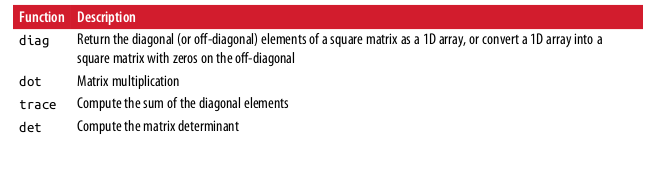
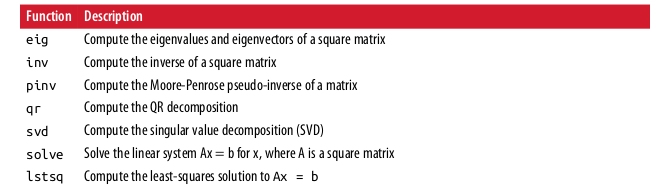

# Números aleatorios
La generación de números pseudoaleatorios es una parte esencial de muchas aplicaciones científicas y de simulación. El módulo `numpy.random` en Python proporciona funciones para generar eficientemente matrices completas de valores de muestra a partir de muchas distribuciones de probabilidad.

Por ejemplo, puedes obtener una matriz de 4x4 de muestras de la distribución normal estándar utilizando la función `normal` de la siguiente manera:


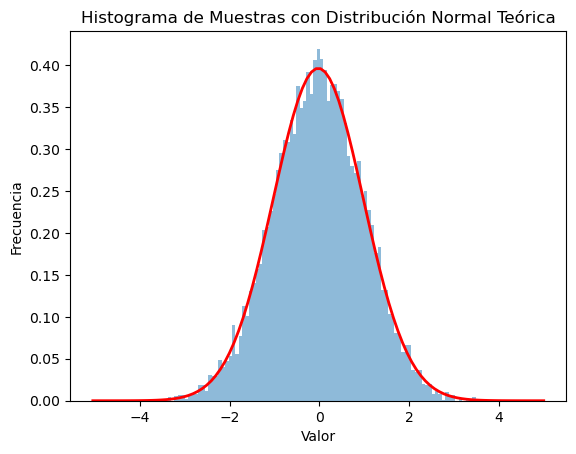

-0.02474311866444637 1.0067213659577248


In [108]:

from scipy.stats import norm

# Generar una matriz nxn de muestras de la distribución normal estándar
samples = np.random.normal(size=(100, 100))

# Calcular la media y la desviación estándar de las muestras
mu, std = np.mean(samples), np.std(samples)

# Generar los valores teóricos de la distribución normal
x = np.linspace(mu - 5*std, mu + 5*std, 100)
p = norm.pdf(x, mu, std)

# Visualizar estas muestras utilizando un gráfico de histograma
plt.hist(samples.flatten(), bins=100, alpha=0.5, density=True)
plt.plot(x, p, 'r', linewidth=2)
plt.title('Histograma de Muestras con Distribución Normal Teórica')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()
print(mu,std)

Lista de alguna de las funciones de *numpy.random*
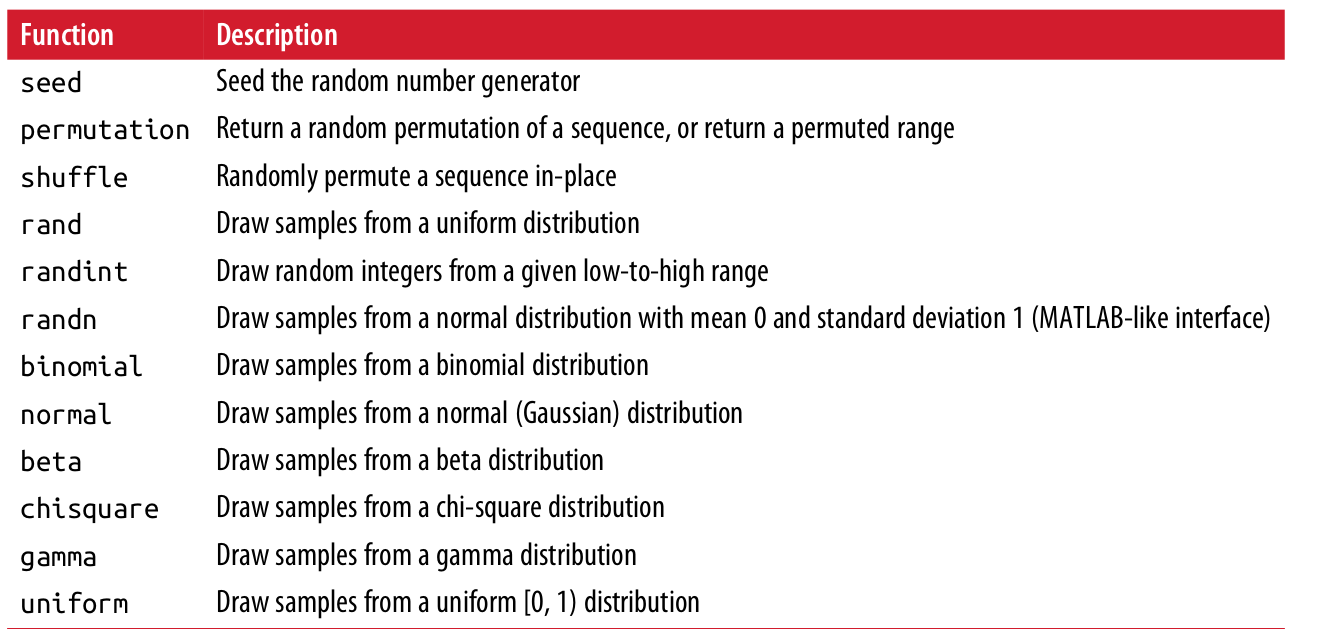


## Ejemplo: Random Walk



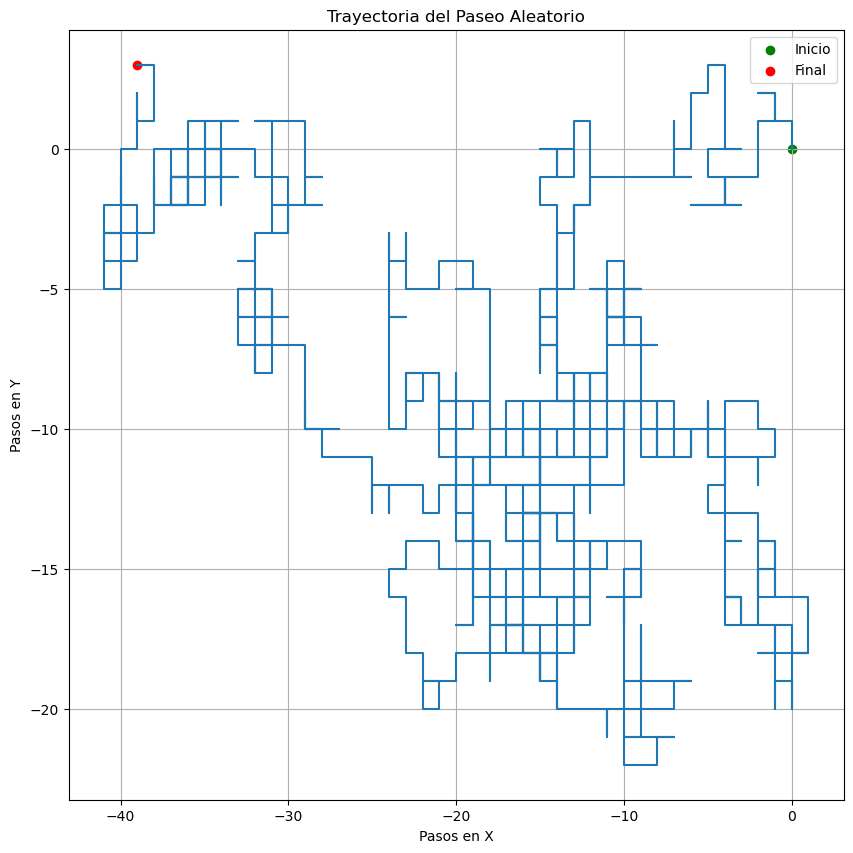

In [86]:
import random
import matplotlib.pyplot as plt

def random_walk(n):
    x, y = 0, 0
    x_list, y_list = [x], [y]
    for i in range(n):
        (dx, dy) = random.choice([(0, 1), (0, -1), (1, 0), (-1, 0)])
        x += dx
        y += dy
        x_list.append(x)
        y_list.append(y)
    return x_list, y_list

# Realizar un paseo aleatorio de 1000 pasos
x_walk, y_walk = random_walk(1000)

# Visualizar la trayectoria del paseo
plt.figure(figsize=(10,10))
plt.plot(x_walk, y_walk)
plt.scatter(x_walk[0], y_walk[0], color='green', label='Inicio')  # Marcar el punto inicial en verde
plt.scatter(x_walk[-1], y_walk[-1], color='red', label='Final')  # Marcar el punto final en rojo
plt.title('Trayectoria del Paseo Aleatorio')
plt.xlabel('Pasos en X')
plt.ylabel('Pasos en Y')
plt.legend()
plt.grid(True)
plt.show()



## Ejemplo: Simulando Multiples Random Walks a la vez

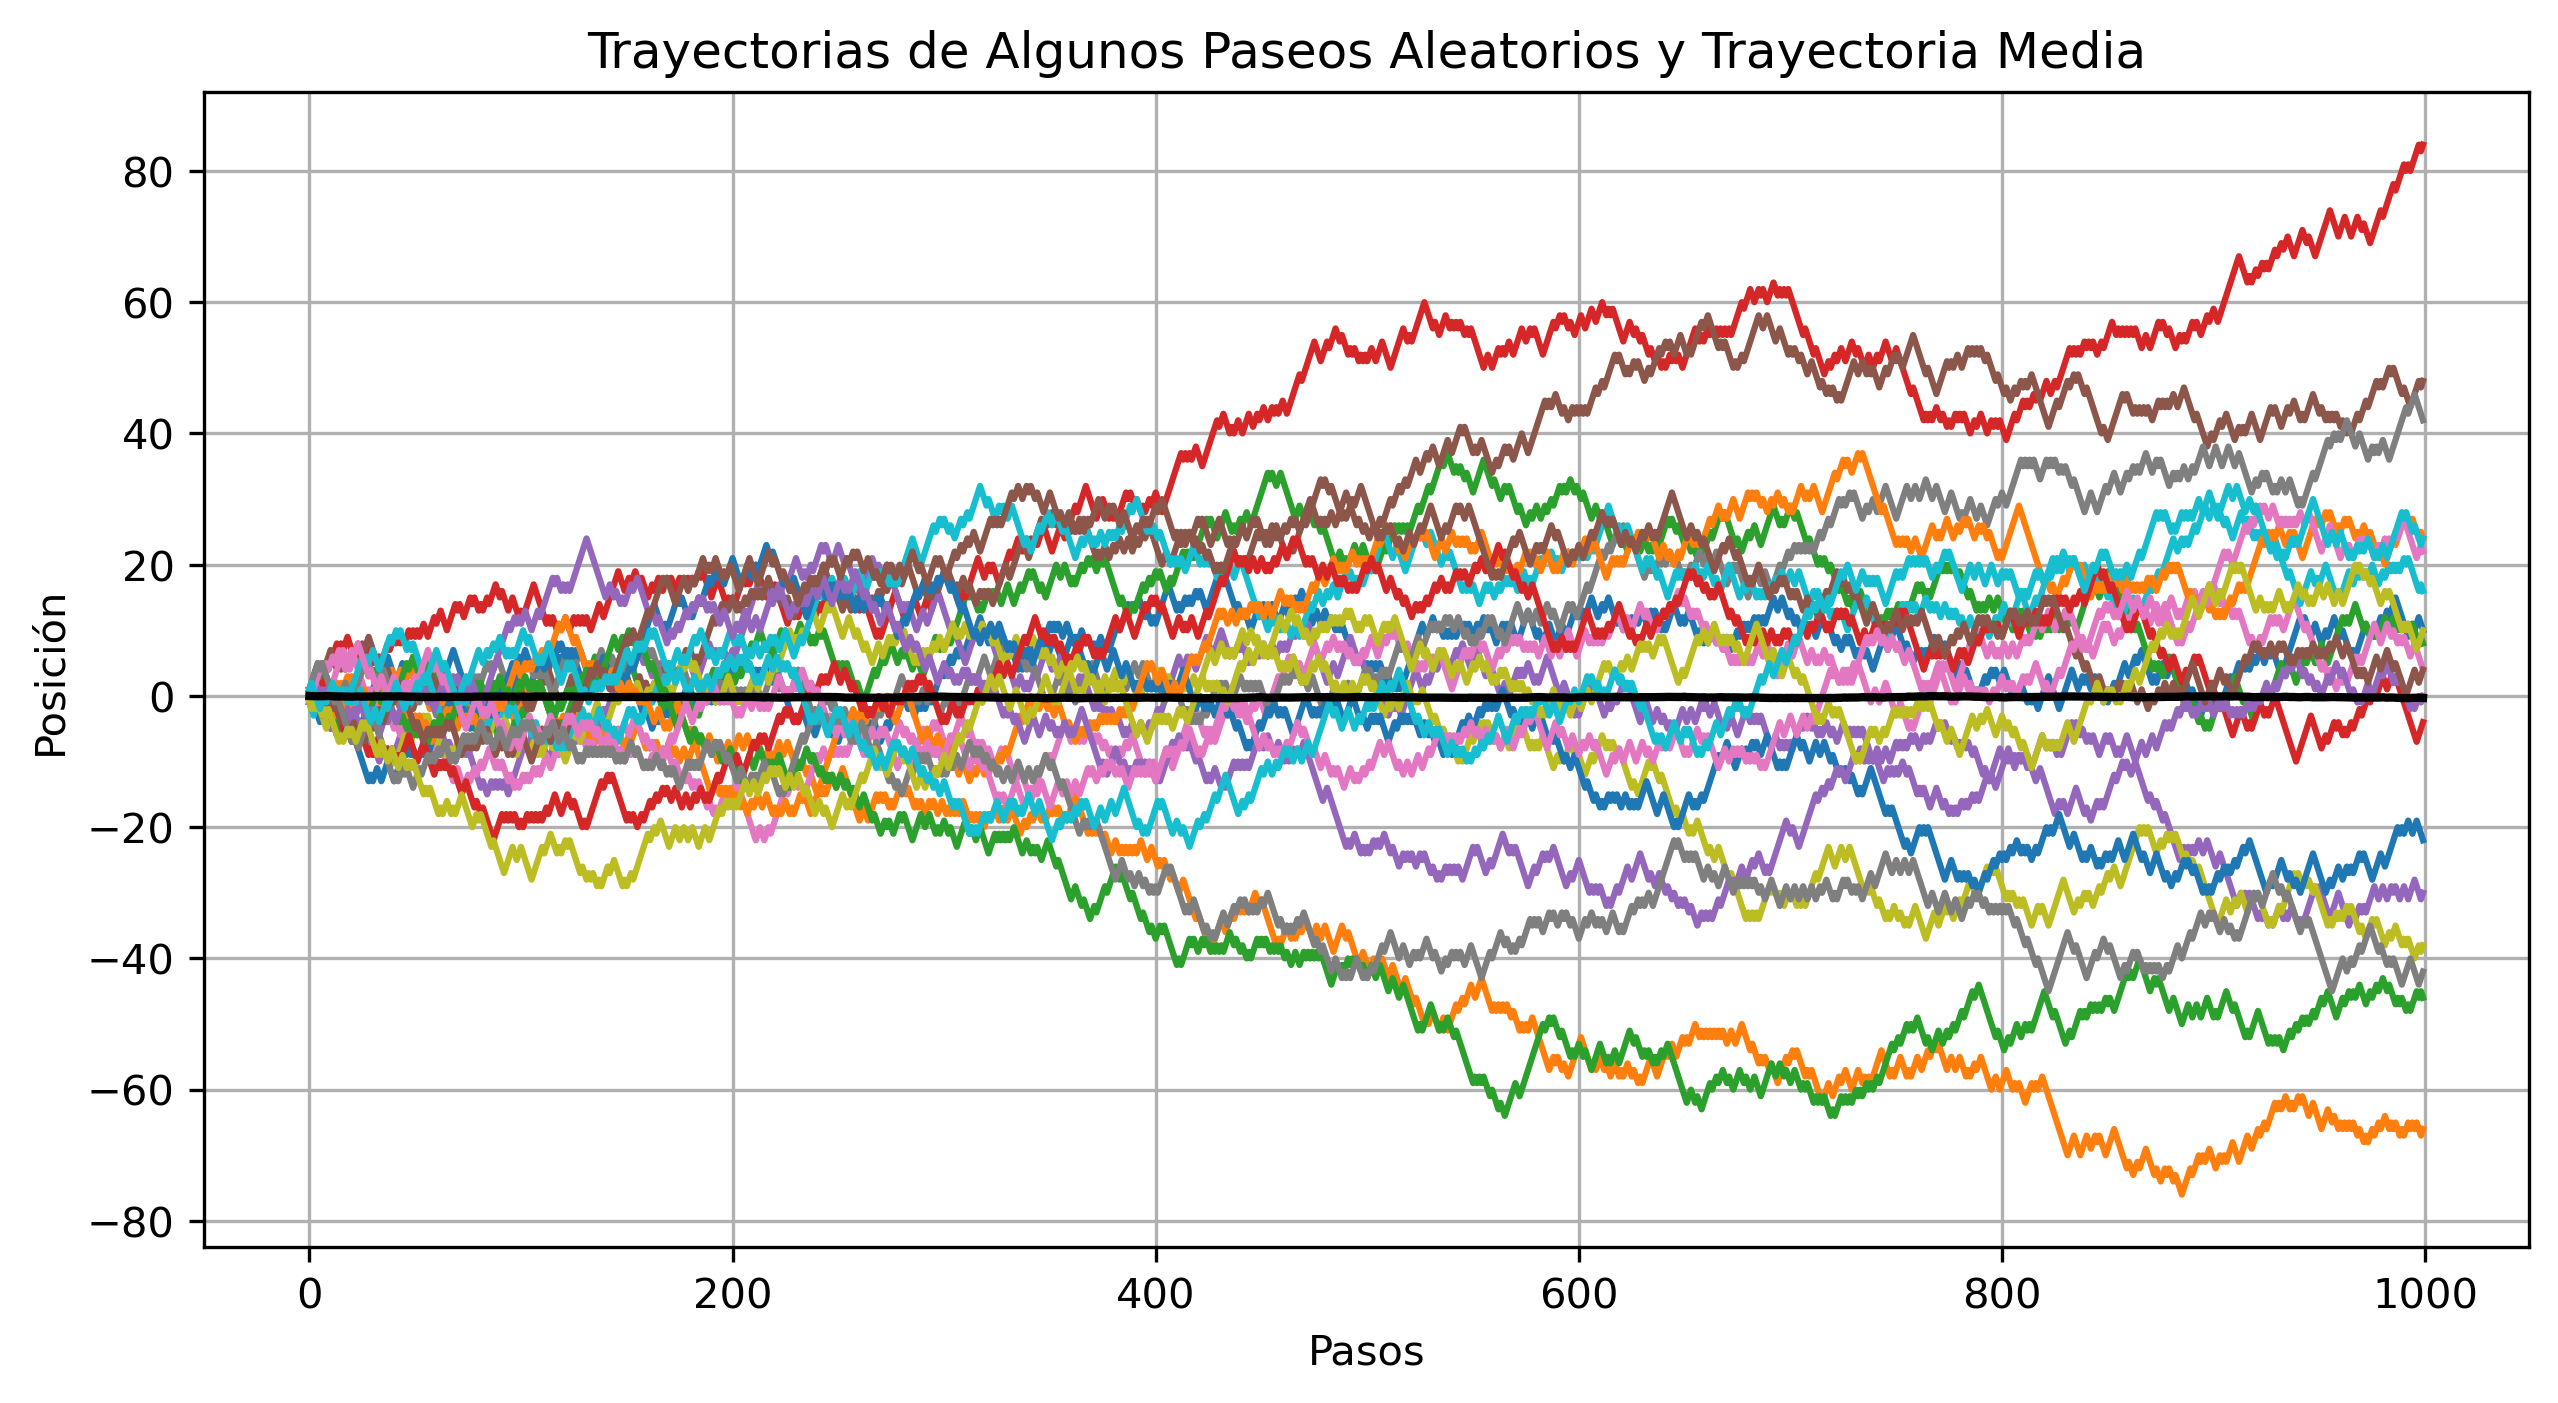

array([[-1,  1, -1, ...,  1, -1, -1],
       [ 1, -1,  1, ..., -1, -1,  1],
       [-1,  1,  1, ..., -1,  1, -1],
       ...,
       [-1, -1, -1, ...,  1, -1,  1],
       [ 1, -1, -1, ..., -1, -1,  1],
       [-1, -1,  1, ...,  1,  1,  1]])

In [101]:
import numpy as np
import matplotlib.pyplot as plt

# Número de paseos aleatorios y número de pasos
num_walks, num_steps = 5000, 1000

# Generar los pasos para todos los paseos aleatorios a la vez
steps = np.random.choice([-1, 1], size=(num_walks, num_steps))

# Calcular las posiciones para todos los paseos aleatorios
positions = np.cumsum(steps, axis=1)

# Calcular la posición media en cada paso
mean_position = np.mean(positions, axis=0)

# Visualizar algunas de las trayectorias
plt.figure(figsize=(10,5), dpi=300)
for i in range(20):  # Cambia este número para visualizar más o menos trayectorias
    plt.plot(positions[i], label=f'Paseo {i+1}')
# Visualizar la trayectoria media de todos los paseos aleatorios
plt.plot(mean_position, 'k', linewidth=2, label='Media')
plt.title('Trayectorias de Algunos Paseos Aleatorios y Trayectoria Media')
plt.xlabel('Pasos')
plt.ylabel('Posición')
#plt.legend()
plt.grid(True)
plt.show()

steps


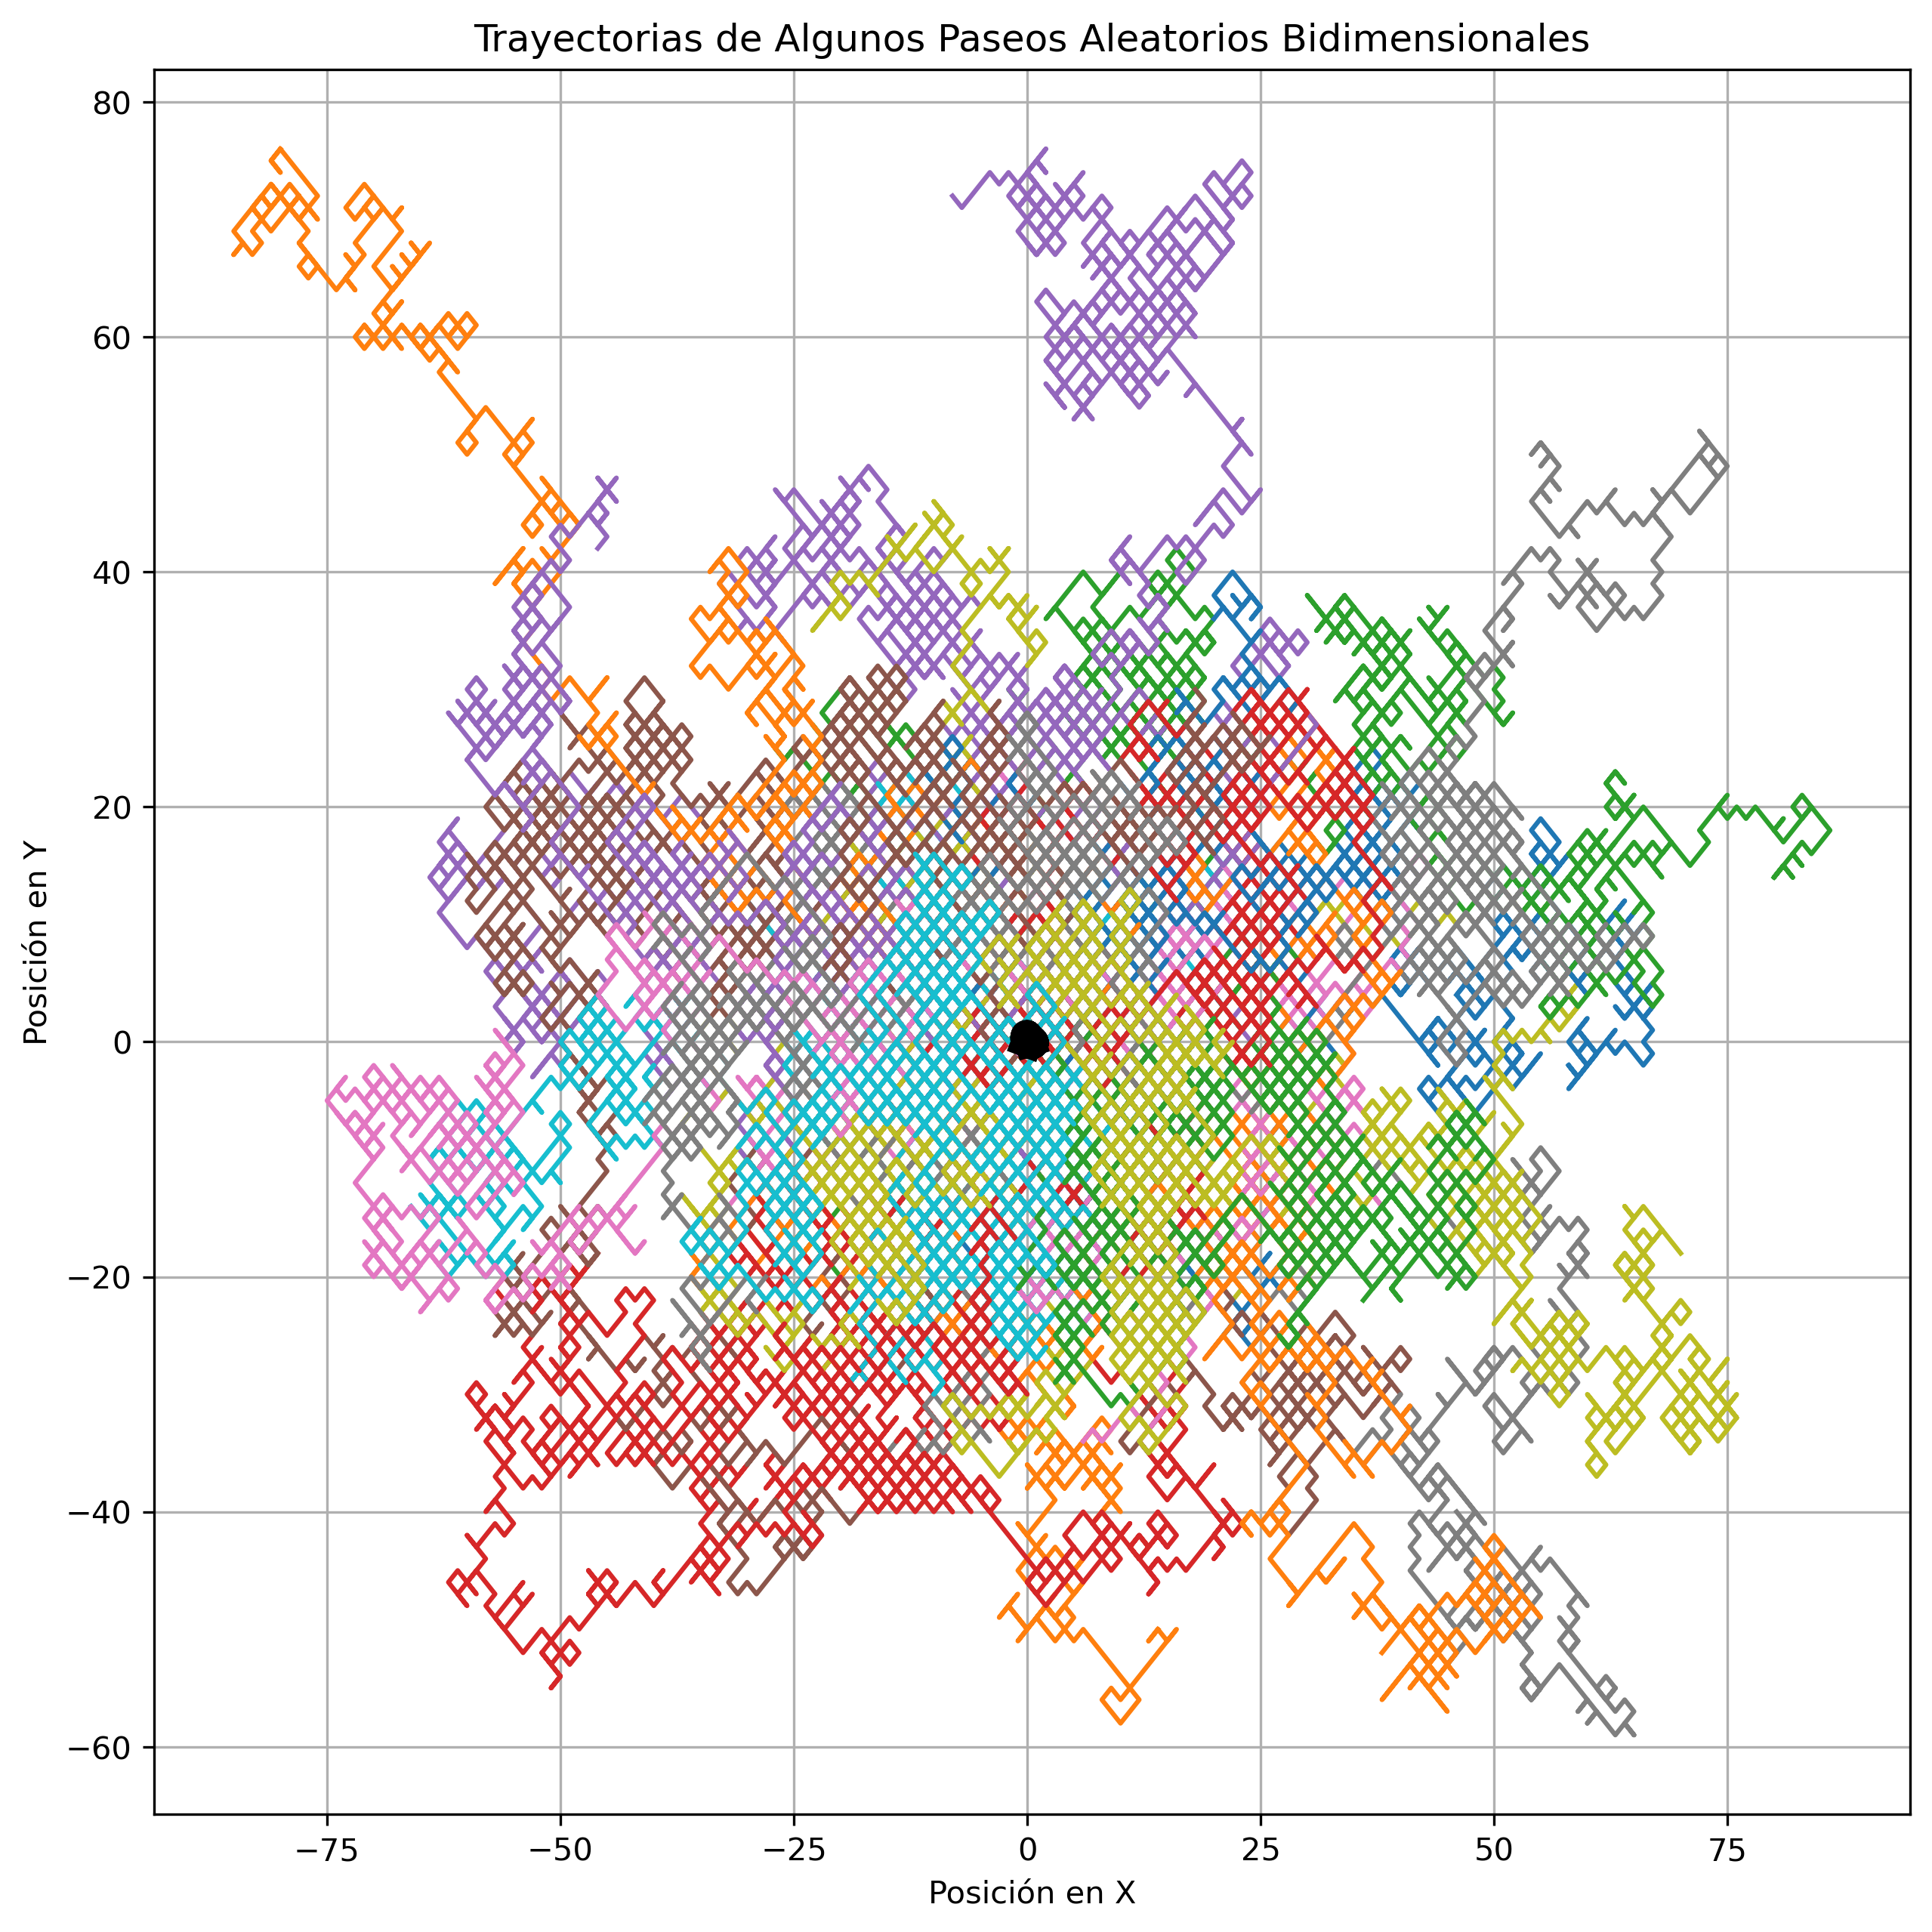

In [97]:
import numpy as np
import matplotlib.pyplot as plt

# Número de paseos aleatorios y número de pasos
num_walks, num_steps = 5000, 1000

# Generar los pasos para todos los paseos aleatorios a la vez
steps_x = np.random.choice([-1, 1], size=(num_walks, num_steps))
steps_y = np.random.choice([-1, 1], size=(num_walks, num_steps))

# Calcular las posiciones para todos los paseos aleatorios
positions_x = np.cumsum(steps_x, axis=1)
positions_y = np.cumsum(steps_y, axis=1)

# Calcular la posición media en cada paso
mean_position_x = np.mean(positions_x, axis=0)
mean_position_y = np.mean(positions_y, axis=0)

# Visualizar algunas de las trayectorias
plt.figure(figsize=(10,10), dpi=300)
for i in range(50):  # Cambia este número para visualizar más o menos trayectorias
    plt.plot(positions_x[i], positions_y[i], label=f'Paseo {i+1}')
# Visualizar la trayectoria media de todos los paseos aleatorios
plt.plot(mean_position_x, mean_position_y, 'k', linewidth=10)
plt.title('Trayectorias de Algunos Paseos Aleatorios Bidimensionales')
plt.xlabel('Posición en X')
plt.ylabel('Posición en Y')
#plt.legend()
plt.grid(True)
plt.show()
